In [ ]:
import pandas as pd
import numpy as np
from plotnine import *
from plotnine.animation import PlotnineAnimation

# for animation in the notebook
from matplotlib import rc
rc('animation', html='html5')

In [ ]:
# Parameters used to control the spiral
n = 100
tightness = 1.3
kmin = 1
kmax = 25
num_frames = 25
theta = np.linspace(-np.pi, np.pi, n)

def plot(k):
    # For every plot we change the theta
    _theta = theta*k

    # Polar Equation of each spiral
    r = tightness*_theta

    df = pd.DataFrame({
        'theta': _theta,
        'r': r,
        'x': r*np.sin(_theta),
        'y': r*np.cos(_theta)
    })

    p = (ggplot(df)
         + geom_path(aes('x', 'y', color='theta'), size=1)
         + lims(
             # All the plots have scales with the same limits
             x=(-130, 130),
             y=(-130, 130),
             color=(-kmax*np.pi, kmax*np.pi)
         )
         + theme_void()
         + theme(
             aspect_ratio=1,
             # Make room on the right for the legend
             subplots_adjust={'right': 0.85}
         )
    )
    return p

# It is better to use a generator instead of a list
plots = (plot(k) for k in np.linspace(kmin, kmax, num_frames))
ani = PlotnineAnimation(plots, interval=100, repeat_delay=500)
# ani.save('/tmp/animation.mp4')
ani

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

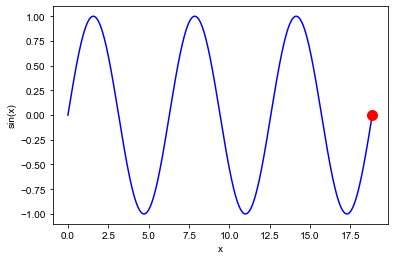

In [8]:
n = 1000
x = np.linspace(0, 6*np.pi, n)
y = np.sin(x)

# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='a red circle following a blue sine wave')
writer = FFMpegWriter(fps=15, metadata=metadata)

# Initialize the movie
fig = plt.figure()

# plot the sine wave line
sine_line, = plt.plot(x, y, 'b')
red_circle, = plt.plot([], [], 'ro', markersize = 10)
plt.xlabel('x')
plt.ylabel('sin(x)')

# Update the frames for the movie
with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(n):
        x0 = x[i]
        y0 = y[i]
        red_circle.set_data(x0, y0)
        writer.grab_frame()